# 21M.387 Fundamentals of Music Processing
## Fourier Transform, part 1

In this lecture, we describe the Fourier Transform, one of the most powerful and ubiquitous tools in audio signal processing. We'll focus on the Discrete Fourier Transform (DFT), where "input" to the DFT is a sampled time signal, and the "output" of the DFT is a set of discrete (ie, sampled) frequencies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

#%matplotlib notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

## Reading

Chapter 2.0 - 2.1.3 (pp 39 – 53)

<img src="images/book_cover.png" width=200>

Also really useful:

<img src="images/MDFT.jpg" width=200>

The text of the book can be found here:
https://ccrma.stanford.edu/~jos/mdft/

## What the DFT Does

Start with a sampled signal (ie, time series) of finite length.  
The DFT will "extract" the frequency components that make up that signal.

Here are a few examples:

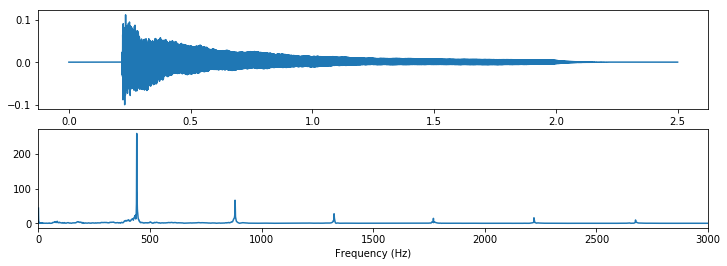

In [2]:
plot_fft_and_listen('audio/pianoA4.wav')

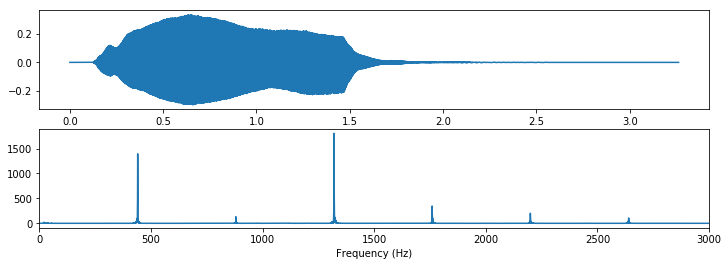

In [3]:
plot_fft_and_listen('audio/clarinetA4.wav')

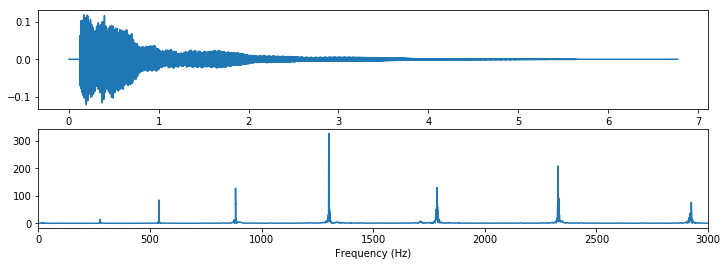

In [4]:
plot_fft_and_listen('audio/tubularA4.wav')

We'll call our signal $x(n)$.  
This signal was _sampled_ from $f(t)$ at a sampling rate of $F_s = 22050$.  
Or, we could say it was sampled at a _period_ of $T = 1/F_s = .00004545$ seconds.

so $x(n) = f(nT)$

## The Discrete Fourier Transform

The equation for the DFT is:

$$X(k) = \sum_{n=0}^{N-1}x(n)e^{-j 2 \pi kn / N } \text{, for } k \in [0:N-1]$$

- $X(k)$ is the DFT of $x(n)$, sometimes called the _spectrum_ of $x(n)$. 
- We use a _lower case_ $x(n)$ for the time-series and a _capital_ $X(k)$ for the spectrum.
- $N$ is the length of the DFT, which is also the length of the input signal $x(n)$.
- The argument $k$ takes the role of _frequency_, but is a _frequency index_ (sometimes knows as a _frequency bin_).
- The DFT's output is a set of $N$ complex numbers (evaluated at $k \in [0, N-1]$).
- the frequency corresponding to $k$ is $f_k = k {F_s \over N}$

The rest of this lecture will describe how the DFT works.

But first, a few more examples.

sample rate: 22050
N:  79360


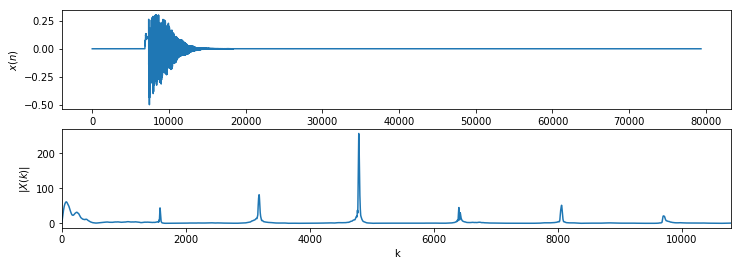

In [5]:
plot_fft_and_listen('audio/guitar_pluckA4.wav', raw_axis=True)

In [6]:
# this shows the "raw" output of the DFT:
k = 1582 # first peak
fs = 22050.
N = 79360

# frequency at first peak:
fk = k * fs / N
print 'fk = %.2fHz' % fk

fk = 439.56Hz


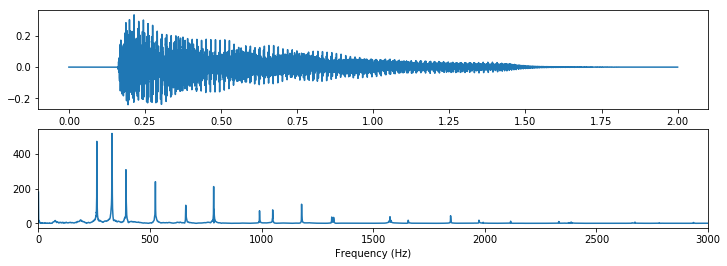

In [7]:
plot_fft_and_listen('audio/pianoCEG.wav')

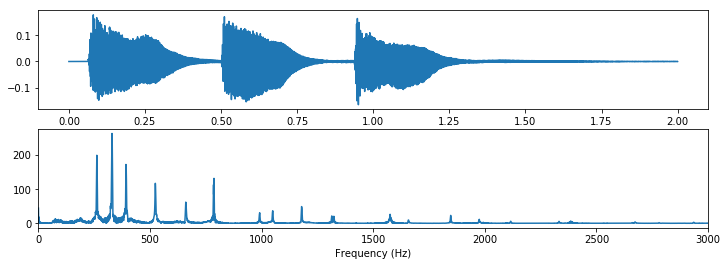

In [8]:
plot_fft_and_listen('audio/piano_arpeg.wav')

## The Sinusoid

The basic sinusoid has either of the following equations:  
$$x(t) = A \sin(\omega t + \phi)$$
or
$$x(t) = A \cos(\omega t + \phi)$$

- $\omega$ is the _angular velocity_.
- $\phi \in [- \pi, \pi)$ is the _phase_.
- $A$ is the amplitude of the sinusoid.

All sinusoids are uniquely defined by this parameter set: $\{A, \omega, \phi \}$.  

We write $\omega = 2 \pi f$ where $f$ is the _frequency_ in units of Hertz (Hz). 

Note that the textbook uses $\omega$ to mean _frequency_ (in Hz), and $\phi$ to mean _unit phase_, $\phi \in [0,1)$. Sometimes the sign of $\phi$ is flipped, so instead you will see:
$$ x(t) = A \sin(2 \pi (\omega t - \phi)) $$


Be careful about possible confusion here. I will use the first definition.

## Discrete Time Sinusoid

Going forward, all signals we analyze will be:
- sampled, indexed by $n$
- of length $N$

The sampling rate $F_s$ will not figure into the equations. $F_s$ only matters for interpreting what $k$ means.  
Remember that $f = k {F_s \over N}$

Sampling the basic sinusoid at period $T = {1 \over F_s}$:

$
\begin{align}
x(t) & = A \cos(\omega t + \phi) \\
x(n) & = A \cos(\omega nT + \phi) \\
     & = A \cos(2 \pi f nT + \phi) \\
     & = A \cos(2 \pi k {F_s \over N} nT + \phi) \\
     & = A \cos(2 \pi {k \over N} n + \phi) \\
\end{align}
$

So we now characterize a DT sinusoid with parameters $\{A, k, \phi\}$

In [9]:
# helper functions:
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)

def make_sine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.sin( 2 * np.pi * k / N * n + ph)

N = 100
@interact( a=(0.5, 3.), k=(1, 10.), ph=(-PI, PI))
def plot_cosine(a = 1, k = 1, ph = 0) :
    x = make_cosine(a, k, ph, N)
    plt.figure()
    plt.plot(x, 'ro')
    plt.ylim(-3, 3)
    plt.xlabel('n')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description=u'a', max=3.0, min=0.5), FloatSlider(value=1.0, description=u'k', max=10.0, min=1.0), FloatSlider(value=0.0, description=u'ph', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

Let's look at the full range of $k$, including negative numbers.

In [10]:
N = 20
@interact( a=(0.5, 3.), k=(-10, 20), ph=(-PI, PI))
def plot_cosine(k = 1, ph = 0) :
    x = make_cosine(1, k, ph, N)
    f = np.cos(np.linspace(0,2*np.pi*k, 200, endpoint=False) + ph)
    plt.figure()
    plt.plot(np.linspace(0, N, 200, endpoint=False), f)
    plt.stem(x, markerfmt='ro')
    plt.ylim(-1.5, 1.5)
    plt.xlabel('n')
    plt.show()

interactive(children=(IntSlider(value=1, description=u'k', max=20, min=-10), FloatSlider(value=0.0, description=u'ph', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

## Sum of Sinusoid

__Any arbitrary signal__ $x(n)$ can be represented by adding together a particular mix of sinusoids.

As a small example, we create funky-shaped $x(n)$, by adding the following sinusoids:
- $\{A=1.0, k=1, \phi=0 \}$
- $\{A=0.6, k=3, \phi=2.1 \}$
- $\{A=0.4, k=8, \phi=0.6 \}$

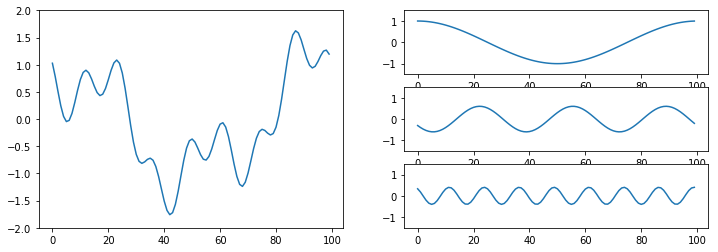

In [11]:
N = 100
c1 = make_cosine(1.0, 1, 0, N)
c2 = make_cosine(0.6, 3, 2.1, N)
c3 = make_cosine(0.4, 8, 0.6, N)
x = c1 + c2 + c3

plt.figure()
plt.subplot(1,2,1)
plt.plot(x)
plt.ylim(-2, 2)

for i, c in enumerate((c1, c2, c3)):
  plt.subplot(3, 2, 2*i+2)
  plt.plot(c)
  plt.ylim(-1.5, 1.5)


The DFT lets us "interrogate" $x(n)$ to recover its pure sinusoid components. The numpy function `numpy.fft.fft(x)` returns the DFT of `x`. 

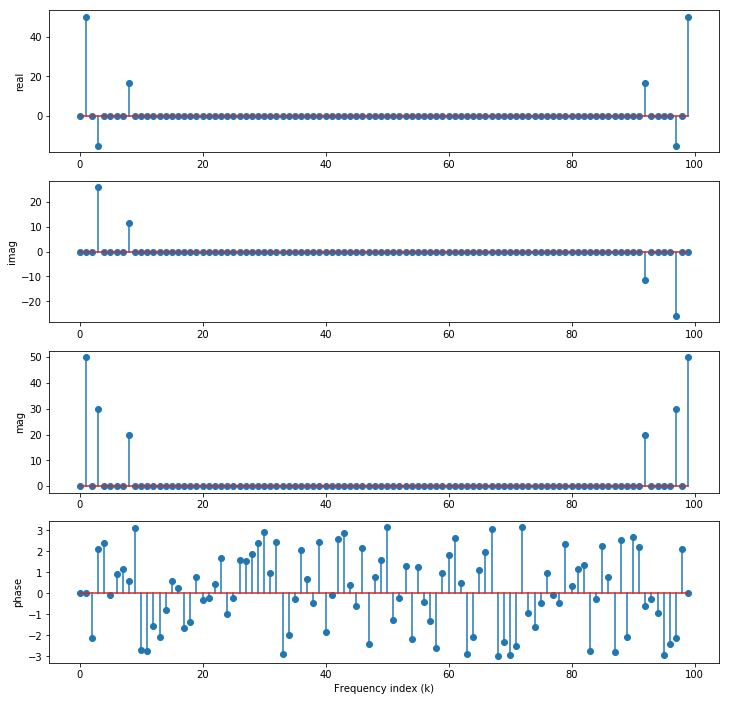

In [12]:
ft = np.fft.fft(x)

ft_mag = np.abs(ft)
ft_ph  = np.angle(ft)
# ft_ph[ft_mag < 0.0001] = 0 # squash values with 0 magnitude 

plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
plt.stem(ft.real)
plt.ylabel('real')
plt.subplot(4,1,2)
plt.stem(ft.imag)
plt.ylabel('imag')
plt.subplot(4,1,3)
plt.stem(ft_mag)
plt.ylabel('mag')
plt.subplot(4,1,4)
plt.stem(ft_ph)
plt.ylabel('phase')
plt.xlabel('Frequency index (k)');

- Spectrum $X(k)$ is symmetric around $k = N/2$.
- Re$\{X(k)\}$ and Im$\{X(k)\}$ are not that useful.
- $\lvert X(k)\lvert$ looks promising.
- $\angle X(k)$ is only meaningful for $k$ when $\lvert X(k)\lvert \gt \epsilon$

To recover $A$ and $\phi$ for a given $k$:

$$A = {1 \over N} (\lvert X(k)\lvert + \lvert X(-k)\lvert) = {2 \over N} \lvert X(k)\lvert $$
$$phi = \angle X(k)$$

(this is only true when $x(n)$ is a _real_ function)

In [13]:
for k in (1,3,8, 10):
    mag = ft_mag[k]
    a = 2 * ft_mag[k] / N
    phi = ft_ph[k]
    print 'k = %d: mag(X) = %.2f. A = %.2f. phase(X) = %.2f' % (k, mag, a, phi)

k = 1: mag(X) = 50.00. A = 1.00. phase(X) = -0.00
k = 3: mag(X) = 30.00. A = 0.60. phase(X) = 2.10
k = 8: mag(X) = 20.00. A = 0.40. phase(X) = 0.60
k = 10: mag(X) = 0.00. A = 0.00. phase(X) = -2.70


## Some Background

Before we figure out why the DFT works, we need to understand three concepts:
- Dot product
- Some properties of sinusoids.
- Euler's identity

### Dot Product

The _dot product_ or _inner product_ is a mathematical operation on 2 vectors of the same length:

$\langle x, s \rangle = \sum_{n=0}^{N-1}x(n) \cdot s(n)$

$x(n), n \in [0, N-1]$ or $x \in \Bbb R^N$  
$s(n), n \in [0, N-1]$ or $s \in \Bbb R^N$  

Take two signals. Multiply the elements. Add the result together to get one _scalar value_.

Even though $x(n)$ is a time series, you can think of it as a single vector in an $N$ dimensional space. Or: $x \in \Bbb R^N$

The intuition behind $\langle x, s \rangle$ is "how much of $s$ is in $x$" or "how much do $s$ and $x$ have in common"?

The actual formula for projection (how much of $s$ is in $x$) is given by:  
$$\alpha = {\langle x, s \rangle \over \Vert s \Vert^ 2}$$
$\alpha$ is the _coefficient of projection_ when determining the projection of $x$ onto $s$: $P_s(x) = \alpha \cdot s$.

If $\langle x, s \rangle = 0$, $x$ and $s$ are _orthogonal_: $x \perp s$.

In [14]:
# Example:

x = np.array((2,5,4))
s = np.array((1,2,-1))

print 'x = ', x
print 's = ', s

print 'method 1: <x,s> = ', np.sum(x * s)
print 'method 2: <x,s> = ', np.dot(x, s)


x =  [2 5 4]
s =  [ 1  2 -1]
method 1: <x,s> =  8
method 2: <x,s> =  8


###  Sinusoid Orthogonality

Let's take the dot product of two sinusoids of length $N$:  
$x_1(n) = \{ A_1, k_1, \phi_1 \}$  
$x_2(n) = \{ A_2, k_2, \phi_2 \}$  
where $k_1, k_2$ are integers.

If $k_1 \neq k_2$, the two sinusoids are _orthogonal_, and $\langle x_1, x_2 \rangle = 0$.

In [15]:
@interact( k1=(1, 10), k2 = (1,10) )
def sinusoid_dot_proudct(k1=2, k2=3) :
    N = 100
    x1 = make_cosine(1, k1, 0, N)
    x2 = make_cosine(1, k2, 0, N)
    x1x2 = x1 * x2
    dp = np.sum(x1x2)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x1)
    plt.plot(x2)
    plt.subplot(2,1,2)
    plt.plot(x1x2, 'r')
    plt.ylim(-1,1)
    plt.ylabel('$x_1 \cdot x_2$')
    plt.text(70, 0.7, '< x1 , x2 > = %.2f' % dp, size=15)
    plt.show()


interactive(children=(IntSlider(value=2, description=u'k1', max=10, min=1), IntSlider(value=3, description=u'k2', max=10, min=1), Output()), _dom_classes=('widget-interact',))

###  Sinusoid Quadrature Phase

Any sinusoid $\{ A, k, \phi \}$ can be expressed as the sum of two _quadrature-phased_ sinusoids so long as $k$ is the same.

$$
\begin{align}
x(n) & = A \cos(2 \pi {k \over N} n + \phi) \\
     & = A_1 \cos(2 \pi {k \over N} n) - A_2 \sin(2 \pi {k \over N} n) \\
\end{align}
$$

We can prove the above statement by using the trig identity:

$$\cos(\alpha+\beta) = \cos(\alpha) \cos(\beta) - \sin(\alpha) \sin(\beta)$$


The relationship between $\{A, \phi\}$ and $\{A_1, A_2\}$ is:  
$$A = \sqrt{A_1^2 + A_2^2}$$
$$\phi = \arctan(A_2, A_1)$$ 

or:  
$$A_1 = A\cos(\phi)$$
$$A_2 = A\sin(\phi)$$

Here is an example of this working:

In [16]:
@interact( a=(1., 2.), phi = (0, 2 * np.pi) )
def quadrature(a=1, phi = 0) :
    k = 4
    N = 100
    # compute A_1 and A_2
    a1 = a * np.cos(phi)
    a2 = a * np.sin(phi)
    
    # create the cosine and sine based on A_1 and A_2
    s1 = make_cosine(a1, k, 0, N)
    s2 = - make_sine(a2, k, 0, N)
    
    # s1 + s2:
    x = s1 + s2
    
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(s1)
    plt.plot(s2)
    plt.ylim(-2, 2)
    plt.legend(('$%.2f\cos(2 \pi kn/N)$'% a1, '$%.2f\sin(2 \pi kn/N)$'% -a2), loc='upper right')
    plt.subplot(2,1,2)
    plt.plot(x, 'r')
    plt.ylim(-2, 2)
    
    plt.ylabel('$s_1 + s_2$')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description=u'a', max=2.0, min=1.0), FloatSlider(value=0.0, description=u'phi', max=6.283185307179586), Output()), _dom_classes=('widget-interact',))

### Euler's Identity

$e^{j\theta} = \cos(\theta) + j \sin(\theta)$

Remember this. We'll use it pretty soon.

## Extracting $A$ and $\phi$

We can extract a sinusoid from a signal $x(n)$ by using the dot product!

To find out if $x(n)$ has a sinusoid with frequency $k$:
- create a "prototype" or "probe" function: $s_k(n) = \cos(2\pi kn/N + \phi)$
- take the dot product $\langle x, s_k \rangle$
- try all values of $k$ and $\phi$ until we get the best (highest) amount.

Example: $x(n) = 4 \cos(2\pi 9n/N + 0.7) \rightarrow \{A = 4, k = 9, \phi=0.7\}$

- If the $k$'s don't match, $\langle x, s_k \rangle = 0$.
- If the $k$'s do match, $\langle x, s_k \rangle$ depends on $\phi$.

In [17]:
@interact( k_s=(1,15), phi_s=(-1.0, 1.0) )
def probe_test(k_s=1, phi_s=0) :
    N = 100
    x = make_cosine(4, 9, 0.7, N)
    s = make_cosine(1, k_s, phi_s, N)
    amount = np.dot( x , s )
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(x)
    plt.plot(s)
    plt.legend(('signal', 'probe'), loc='upper right')

    plt.subplot(2,1,2)
    plt.plot(x * s, 'r')
    plt.ylim(-4,4)

    txt = '$<x,s_k> = %.2f$' % amount
    plt.text(70, 2.5, txt, size=20, bbox=dict(fc='white'))
    plt.show()


interactive(children=(IntSlider(value=1, description=u'k_s', max=15, min=1), FloatSlider(value=0.0, description=u'phi_s', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

### Phase

Trying out all phases iteratively until we get the maximum dot-product is not desirable. Instead, we use the quadrature trick in reverse.

Instead of testing $x(n)$ with $s_k(n) = \cos(2\pi kn/N + \phi)$, we create TWO __zero-phase__ probes:

$$s_{1k}(n) = \cos(2\pi kn/N)$$
and
$$s_{2k}(n) = -\sin(2\pi kn/N)$$

So we run two tests:
- $A_1 = \langle x, s_{1k} \rangle$
- $A_2 = \langle x, s_{2k} \rangle$

$A_1$ is "how much cosine of frequency $k$ is in $x(n)$".  
$A_2$ is "how much (negative) sine of frequency $k$ is in $x(n)$".  

With these two numbers, we can reconstrcut the parameters for $k$-sinusoid in $x(n)$:
$$A = {2 \over N} \sqrt{A_1^2 + A_2^2}$$
$$\phi = \arctan(A_2, A_1)$$

Here is the same example as above.

In [18]:
@interact( k=(1,15), phi_x =(-1.6, 1.6) )
def probe_test(k=1, phi_x = 0.7) :
    N = 100
    x = make_cosine(4, 9, phi_x, N)
    s1 = make_cosine(1, k, 0, N)
    s2 = make_sine(-1, k, 0, N)
    a1 = np.dot( x , s1 )
    a2 = np.dot( x , s2 )

    A = 2 * ((a1**2 + a2**2)**0.5) / N
    phi = np.arctan2(a2, a1)

    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(x)
    plt.plot(s1)
    plt.legend(('signal', 'probe $s_{1k}$'), loc='upper right')
    txt = '$A1 = <x,s_{1k}> = %.2f$' % a1
    plt.text(65, -3, txt, size=17, bbox=dict(fc='white'))

    plt.subplot(2,1,2)
    plt.plot(x)
    plt.plot(s2)
    plt.legend(('signal', 'probe $s_{1k}$'), loc='upper right')
    txt = '$A2 = <x,s_{2k}> = %.2f$' % a2
    plt.text(65, -3, txt, size=17, bbox=dict(fc='white'))
    txt = '$A = %.2f$\n$\phi = %.2f$' % (A, phi)
    plt.text(40,-10,txt, size=17, bbox=dict(fc='white'))
    plt.show()


interactive(children=(IntSlider(value=1, description=u'k', max=15, min=1), FloatSlider(value=0.7, description=u'phi_x', max=1.6, min=-1.6), Output()), _dom_classes=('widget-interact',))

### Extracting from a more complicated $x(n)$

So far, we've just tested against a simple $x(n)$. 

Because of orthogonality, any frequencies of $x(n)$ with $k \ne k_s$ will be ignored by probes "tuned" to $k_s$.

Example of a "pure" $x(n)$ vs a "complicated" $x(n)$:

In [19]:
@interact( pure=True, k_s = (1,15) )
def probe_test(k_s=1, pure = True) :
    N = 100
    x = make_cosine(4, 9, 0.7, N)
    if not pure:
        for k in [2,4,7,12,17,25,37]:
            x += make_cosine(2, k, k * .1, N)
    s1 = make_cosine(1, k_s, 0, N)
    s2 = make_sine(-1, k_s, 0, N)
    a1 = np.dot( x , s1 )
    a2 = np.dot( x , s2 )

    A = 2 * ((a1**2 + a2**2)**0.5) / N
    phi = np.arctan2(a2, a1)

    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(x)
    plt.plot(s1)
    plt.ylim(-6,6)
    plt.legend(('signal', 'probe $s_{1k}$'), loc='upper right')
    txt = '$A1 = <x,s_{1k}> = %.2f$' % a1
    plt.text(65, -3, txt, size=17, bbox=dict(fc='white'))

    plt.subplot(2,1,2)
    plt.plot(x)
    plt.plot(s2)
    plt.ylim(-6,6)    
    plt.legend(('signal', 'probe $s_{1k}$'), loc='upper right')
    txt = '$A2 = <x,s_{2k}> = %.2f$' % a2
    plt.text(65, -3, txt, size=17, bbox=dict(fc='white'))
    txt = '$A = %.2f$\n$\phi = %.2f$' % (A, phi)
    plt.text(40,-12,txt, size=17, bbox=dict(fc='white'))
    plt.show()


interactive(children=(IntSlider(value=1, description=u'k_s', max=15, min=1), Checkbox(value=True, description=u'pure'), Output()), _dom_classes=('widget-interact',))

### Euler revisited

Our test probes for a particular $k$ are:
- $s_{1k}(n) = \cos(2\pi kn/N)$.
- $s_{2k}(n) = -\sin(2\pi kn/N)$.

The tests we run are:
- $A_1 = \langle x, s_{1k} \rangle$
- $A_2 = \langle x, s_{2k} \rangle$

We now treat $s_{1k}$ and $s_{2k}$ as the _real_ and _imaginary_ parts of a single _complex_ probe:

$s_k(n) = s_{1k}(n) + j s_{2k}(n)$

Thus, the dot product is:

$\langle x, s_{1k} \rangle + j \langle x, s_{2k} \rangle = \langle x, s_{1k} + j s_{2k} \rangle = \langle x, s_k \rangle $

Remembering Euler's formulation, we can simplify our notation:

$
\begin{align}
s_k(n) & = s_{1k}(n) + j s_{2k}(n) \\
     & = \cos(2\pi kn / N) - j\sin(2\pi kn/N) \\
     & = e^{-j 2\pi kn / N} \\
\end{align}
$ 

And the test becomes:

$X(k) = \langle x, s_k \rangle$, where $X$ is the complex number $A_1 + jA_2$

### Back to the Discrete Fourier Transform

We are basically there.

$
\begin{align}
X(k) &= \langle x, s_k \rangle \\
     &= \sum_{n=0}^{N-1} x(n) \cdot s_k(n)  \\
     &= \sum_{n=0}^{N-1} x(n) \cdot e^{-j2\pi kn/N}  \\
\end{align}
$

Now we just need to compute $X(k)$ for $k \in [0, N-1]$.

As it turns out, any arbitrary $x(n)$ of length $N$ can be _entirely described_ by exactly $N$ complex frequencies ranging from $k=0$ to $k=N-1$.